                             Linear Classifier

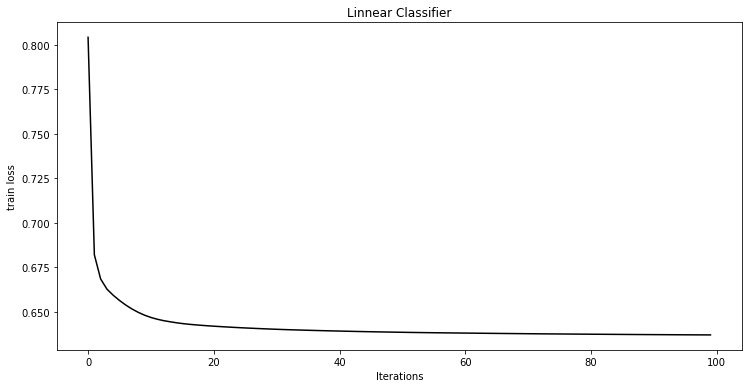

In [1]:

import pandas as pd
import numpy as np
from numpy import random
import array
from numpy import random
import matplotlib.pyplot as plt
from decimal import Decimal

df = pd.read_csv('Roomoccupy.csv', delimiter= ',')
org_df = df.copy()
#normalizing data 

df=(df-df.min())/(df.max()-df.min())
df

df=df.iloc[0:,[0,1,2,3,4,5]]
df=pd.DataFrame(df)

# adding any 5 features in x_values array
x_values=df.iloc[0:,0:5]
x_values = np.array(x_values)

# adding the predictive feature in y_values array
y_values =df.iloc[0:,5]
y_values= np.array(y_values) 

columns=5
#w=np.random.randn(columns)
w=np.zeros(columns)
iteration=100
eta=0.001

def derivative_loss(x_values,y_values,margin):
    d_loss = 0
    if margin>1:
        d_loss=0
    else:  
        d_loss = -(x_values*y_values)
    return d_loss

def hing_loss(x_values,y_values,w,iteration,eta):
    train_arr = []
    t_loss=0
    for k in range(iteration):
        t_loss=0
        for i in range(2664): 
            score=np.dot(w, x_values[i])
            s=np.array(score)
            margin=score*y_values[i]
            temp=1-margin
            h_loss=max(temp,0)
            t_loss += h_loss
            d=derivative_loss(x_values[i],y_values[i],margin)
            w = w - (eta*d)
        train_loss=(1/2664)*t_loss
        train_arr.insert(k, train_loss)
    train_loss_arr=np.array(train_arr)
    return train_loss_arr

#graph for linear classifier
plt.rcParams["figure.figsize"] = [10.50, 5.50]
plt.rcParams["figure.autolayout"] = True
hing=hing_loss(x_values,y_values,w,iteration,eta)
y=hing
it_arr = []
for i in range(0,iteration):
    t = i
    it_arr.append(t)
    
iteration_array=np.array(it_arr)
x=iteration_array
plt.title("Linnear Classifier")
plt.xlabel("Iterations")
plt.ylabel("train loss")
plt.plot(x, y, color="Black")
